In [478]:
#importing all the neccesary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [479]:
#load the data set
df=pd.read_csv('/content/customer_churn (1).csv')

In [480]:
df



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [481]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [482]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,float64
Partner,object
Dependents,object
tenure,float64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [484]:

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **Data Preprocessing**

In [485]:
#to get the numerical columns
num_col = df.select_dtypes(include=['int64','float64','int32']).columns  # year and month not included
num_col


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [486]:
#to fet the categorical columns
cat_col = df.select_dtypes(include=['object']).columns
cat_col

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

# **Handling the Missing Values**

In [487]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


In [488]:
#converting the the data type of total charges from object to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

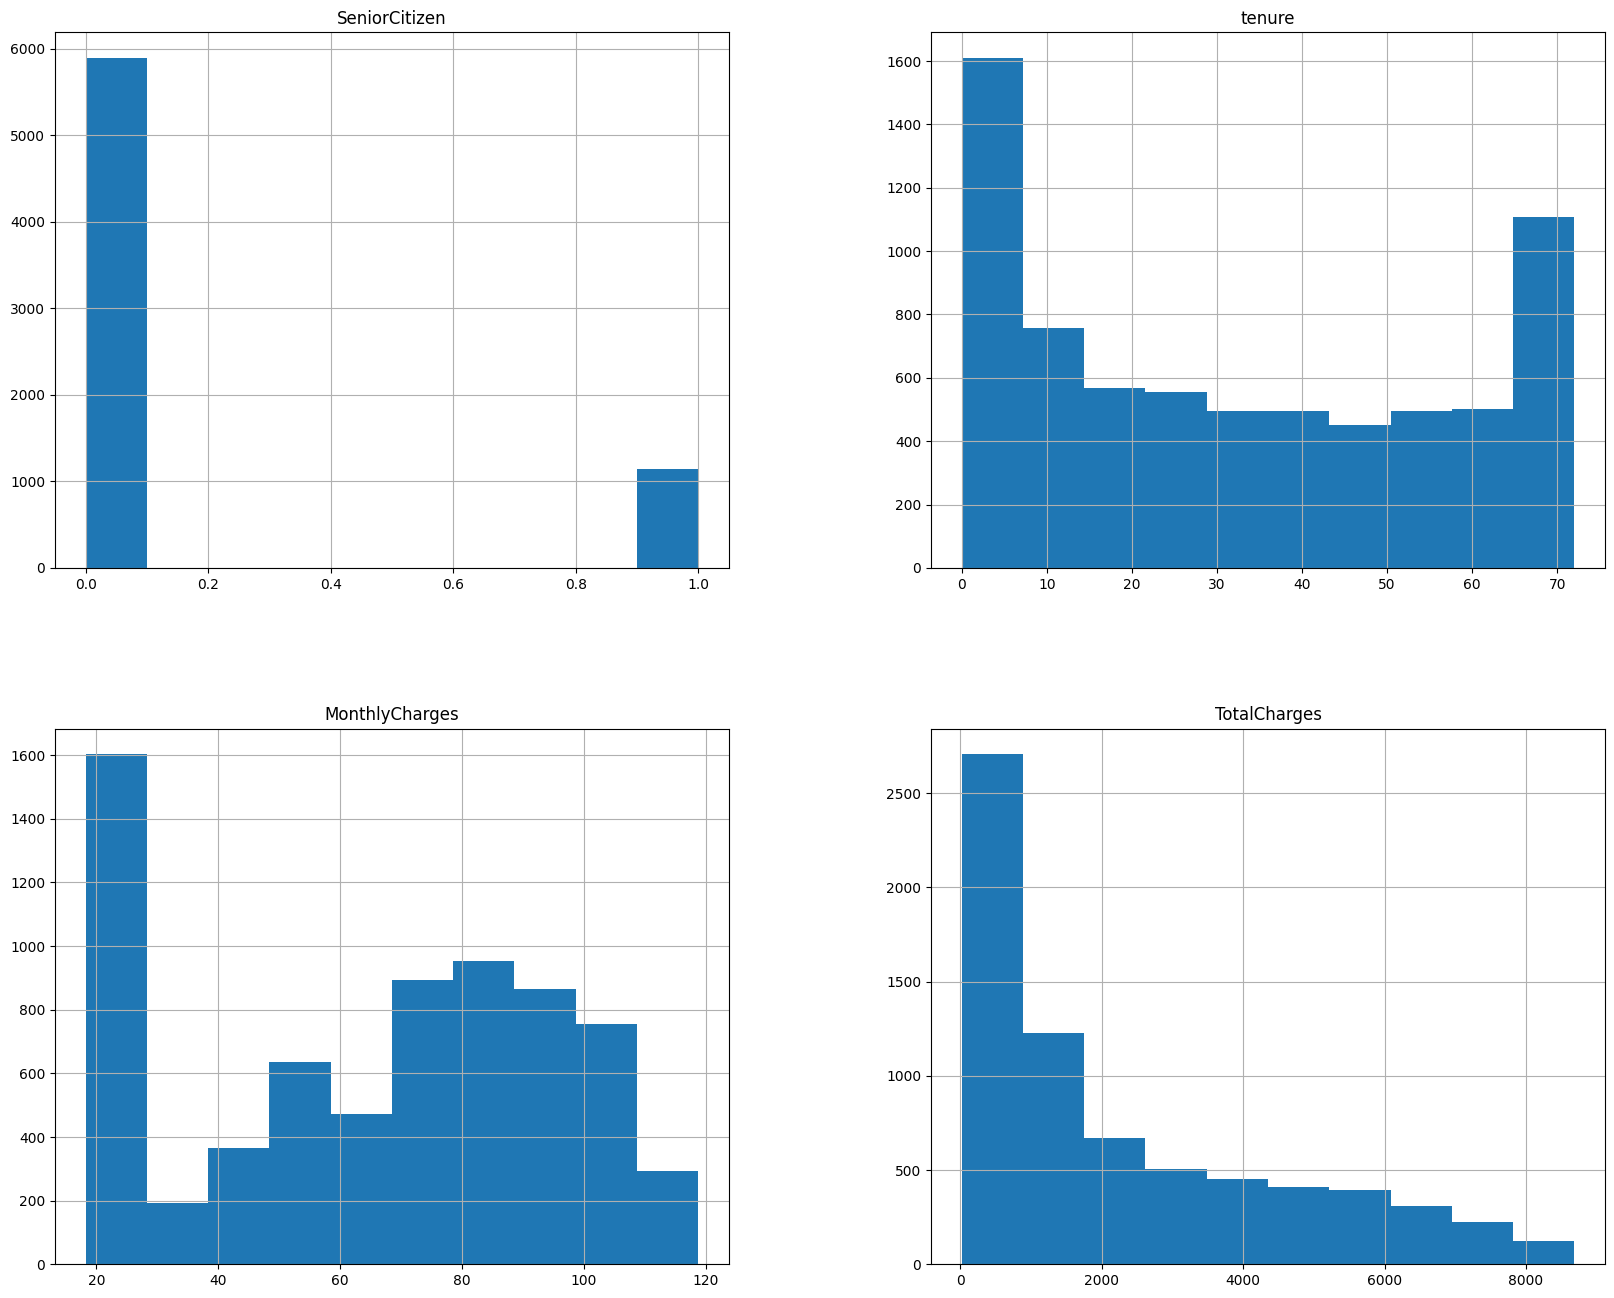

In [489]:
#histogram
df.hist(figsize=[20,16])
plt.show()

In [490]:
df["MonthlyCharges"]=df["MonthlyCharges"].fillna(df["MonthlyCharges"].median())
df["tenure"]=df["tenure"].fillna(df["tenure"].median())
df["SeniorCitizen"]=df["SeniorCitizen"].fillna(df["SeniorCitizen"].median())
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].median())

In [491]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


In [492]:
for i in [ 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']:
  df[i]=df[i].fillna(df[i].mode()[0])

In [493]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [494]:

df.drop(columns=["customerID"], axis=1, inplace=True)

**Univariate Analysis**

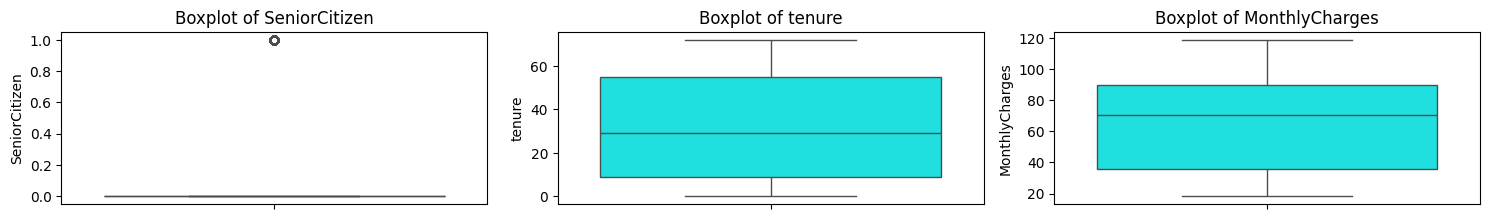

In [495]:
# List of numerical columns to analyze
num_col = ['SeniorCitizen', 'tenure', 'MonthlyCharges']


plt.figure(figsize=(15, 8))

for i, col in enumerate(num_col, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col], color="cyan")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [496]:
df.shape

(7043, 20)

In [497]:
# Calculate IQR
#Q1 = df['SeniorCitizen'].quantile(0.25)
#Q3 = df['SeniorCitizen'].quantile(0.75)
#IQR = Q3 - Q1

# Set limits
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# Drop only extreme outliers
#df = df[(df['SeniorCitizen'] >= lower_bound) & (df['SeniorCitizen'] <= upper_bound)]

not removing outliers because it is valid data in senior citizen


In [498]:
cat_cols = df.select_dtypes(include=['object']).columns

In [499]:
df.dtypes

,0
gender,object
SeniorCitizen,float64
Partner,object
Dependents,object
tenure,float64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [500]:
#to get the unique values of each categorical columns
for col in cat_cols:
    unique_values = df[col].unique()
    print(f"Unique values for {col}: {unique_values}")

Unique values for gender: ['Female' 'Male']
Unique values for Partner: ['Yes' 'No']
Unique values for Dependents: ['No' 'Yes']
Unique values for PhoneService: ['No' 'Yes']
Unique values for MultipleLines: ['No phone service' 'No' 'Yes']
Unique values for InternetService: ['DSL' 'Fiber optic' 'No']
Unique values for OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values for OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values for DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values for TechSupport: ['No' 'Yes' 'No internet service']
Unique values for StreamingTV: ['No' 'Yes' 'No internet service']
Unique values for StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values for Contract: ['Month-to-month' 'One year' 'Two year']
Unique values for PaperlessBilling: ['Yes' 'No']
Unique values for PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values for Churn: ['No' 'Yes']


<Axes: xlabel='gender', ylabel='count'>

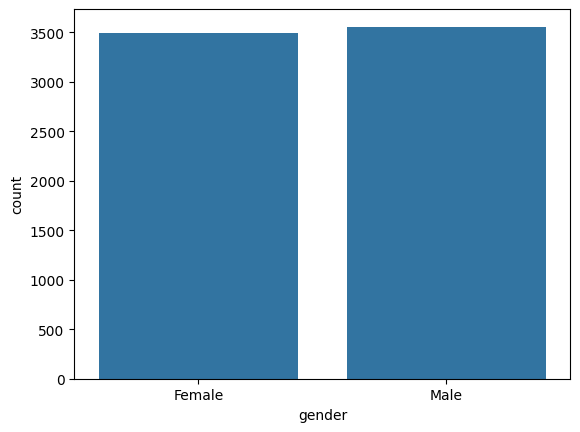

In [501]:
sns.countplot(data=df, x='gender')



<Axes: xlabel='InternetService', ylabel='count'>

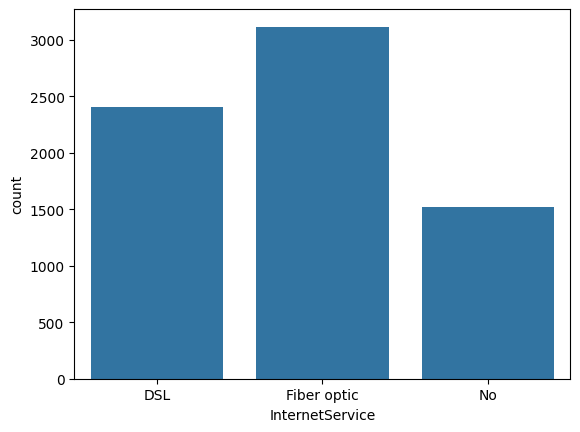

In [502]:
sns.countplot(data=df, x='InternetService')



<Axes: xlabel='Churn', ylabel='count'>

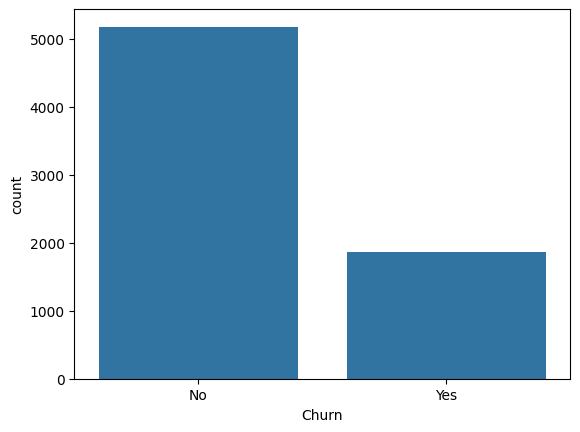

In [503]:


sns.countplot(data=df, x='Churn')


**Bivariate Analysis**

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

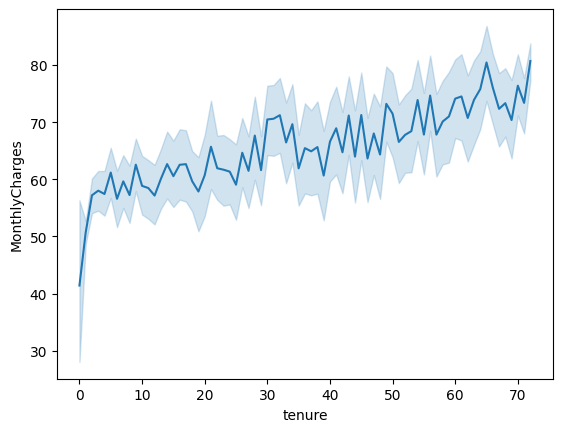

In [504]:
 sns.lineplot(x='tenure', y='MonthlyCharges', data=df)

<Axes: xlabel='Churn', ylabel='Partner'>

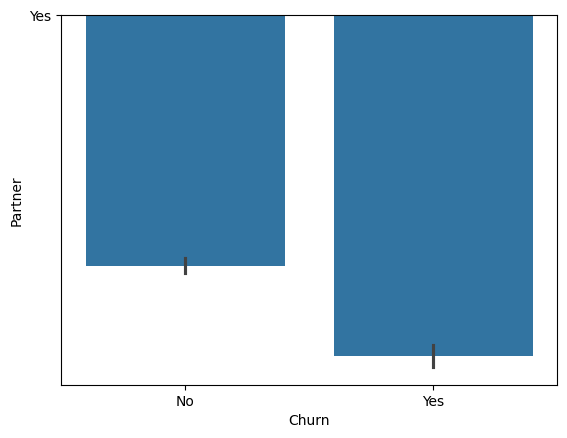

In [505]:
sns.barplot(x='Churn', y='Partner', data=df)

**Encoding**

In [506]:
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store LabelEncoder objects for each column
label_encoders = {}

# Iterate over categorical columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])



In [507]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0.0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0.0,1,1,24.0,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0.0,1,1,72.0,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0.0,1,1,11.0,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1.0,1,0,4.0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [508]:
for col in cat_cols:
    unique_values = df[col].unique()
    print(f"Unique values for {col}: {unique_values}")

Unique values for gender: [0 1]
Unique values for Partner: [1 0]
Unique values for Dependents: [0 1]
Unique values for PhoneService: [0 1]
Unique values for MultipleLines: [1 0 2]
Unique values for InternetService: [0 1 2]
Unique values for OnlineSecurity: [0 2 1]
Unique values for OnlineBackup: [2 0 1]
Unique values for DeviceProtection: [0 2 1]
Unique values for TechSupport: [0 2 1]
Unique values for StreamingTV: [0 2 1]
Unique values for StreamingMovies: [0 2 1]
Unique values for Contract: [0 1 2]
Unique values for PaperlessBilling: [1 0]
Unique values for PaymentMethod: [2 3 0 1]
Unique values for Churn: [0 1]


**Multivariate Analysis**

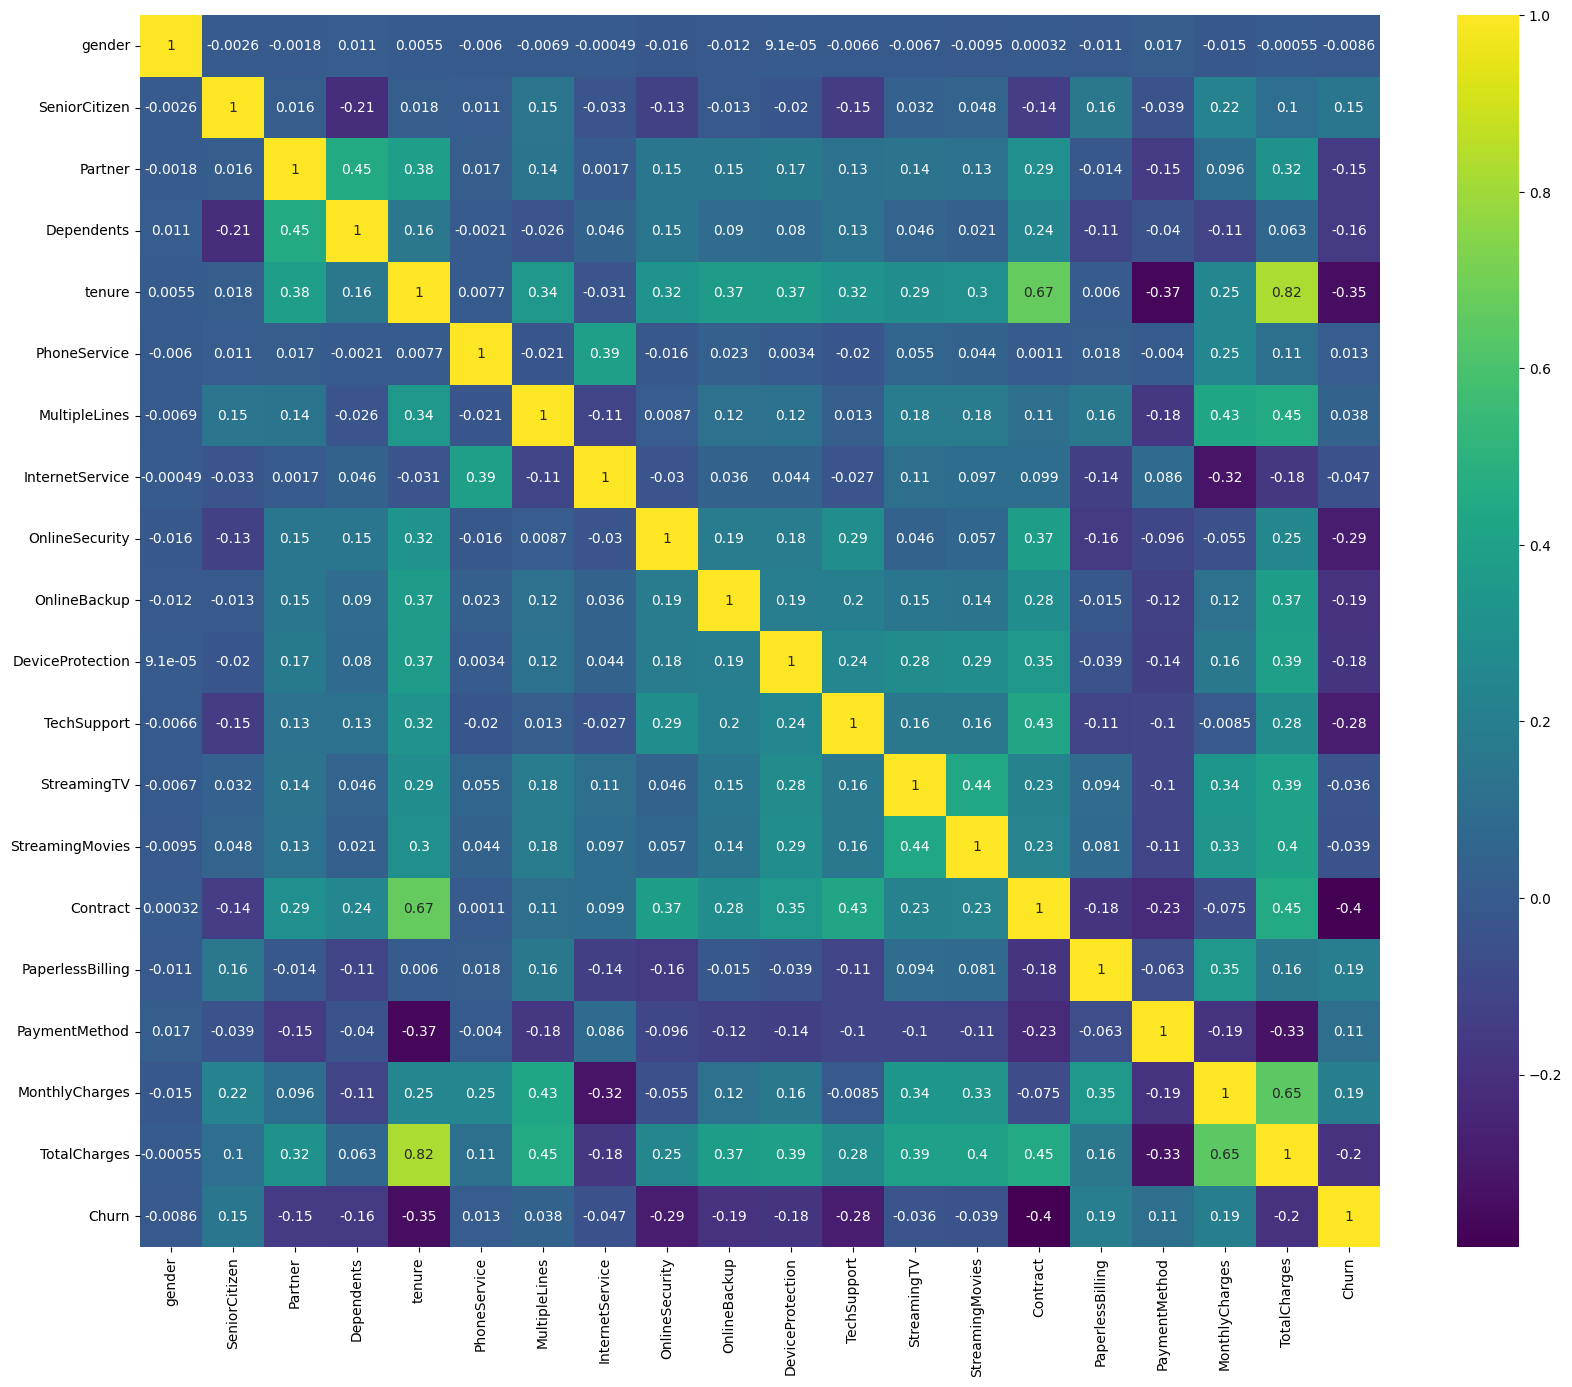

In [509]:
corr_matrix = df.corr()

# Set the figure size before creating the heatmap
plt.figure(figsize=(20,16))  # Adjust width and height as needed

sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

In [510]:
#removing the variable that have storng correlation with independent variables to reduce multi colllinearity
df.drop(columns=["TotalCharges"], axis=1, inplace=True)

In [511]:
df.drop(columns=["PaymentMethod"], axis=1, inplace=True)


In [512]:
df.drop(columns=["Partner"], axis=1, inplace=True)

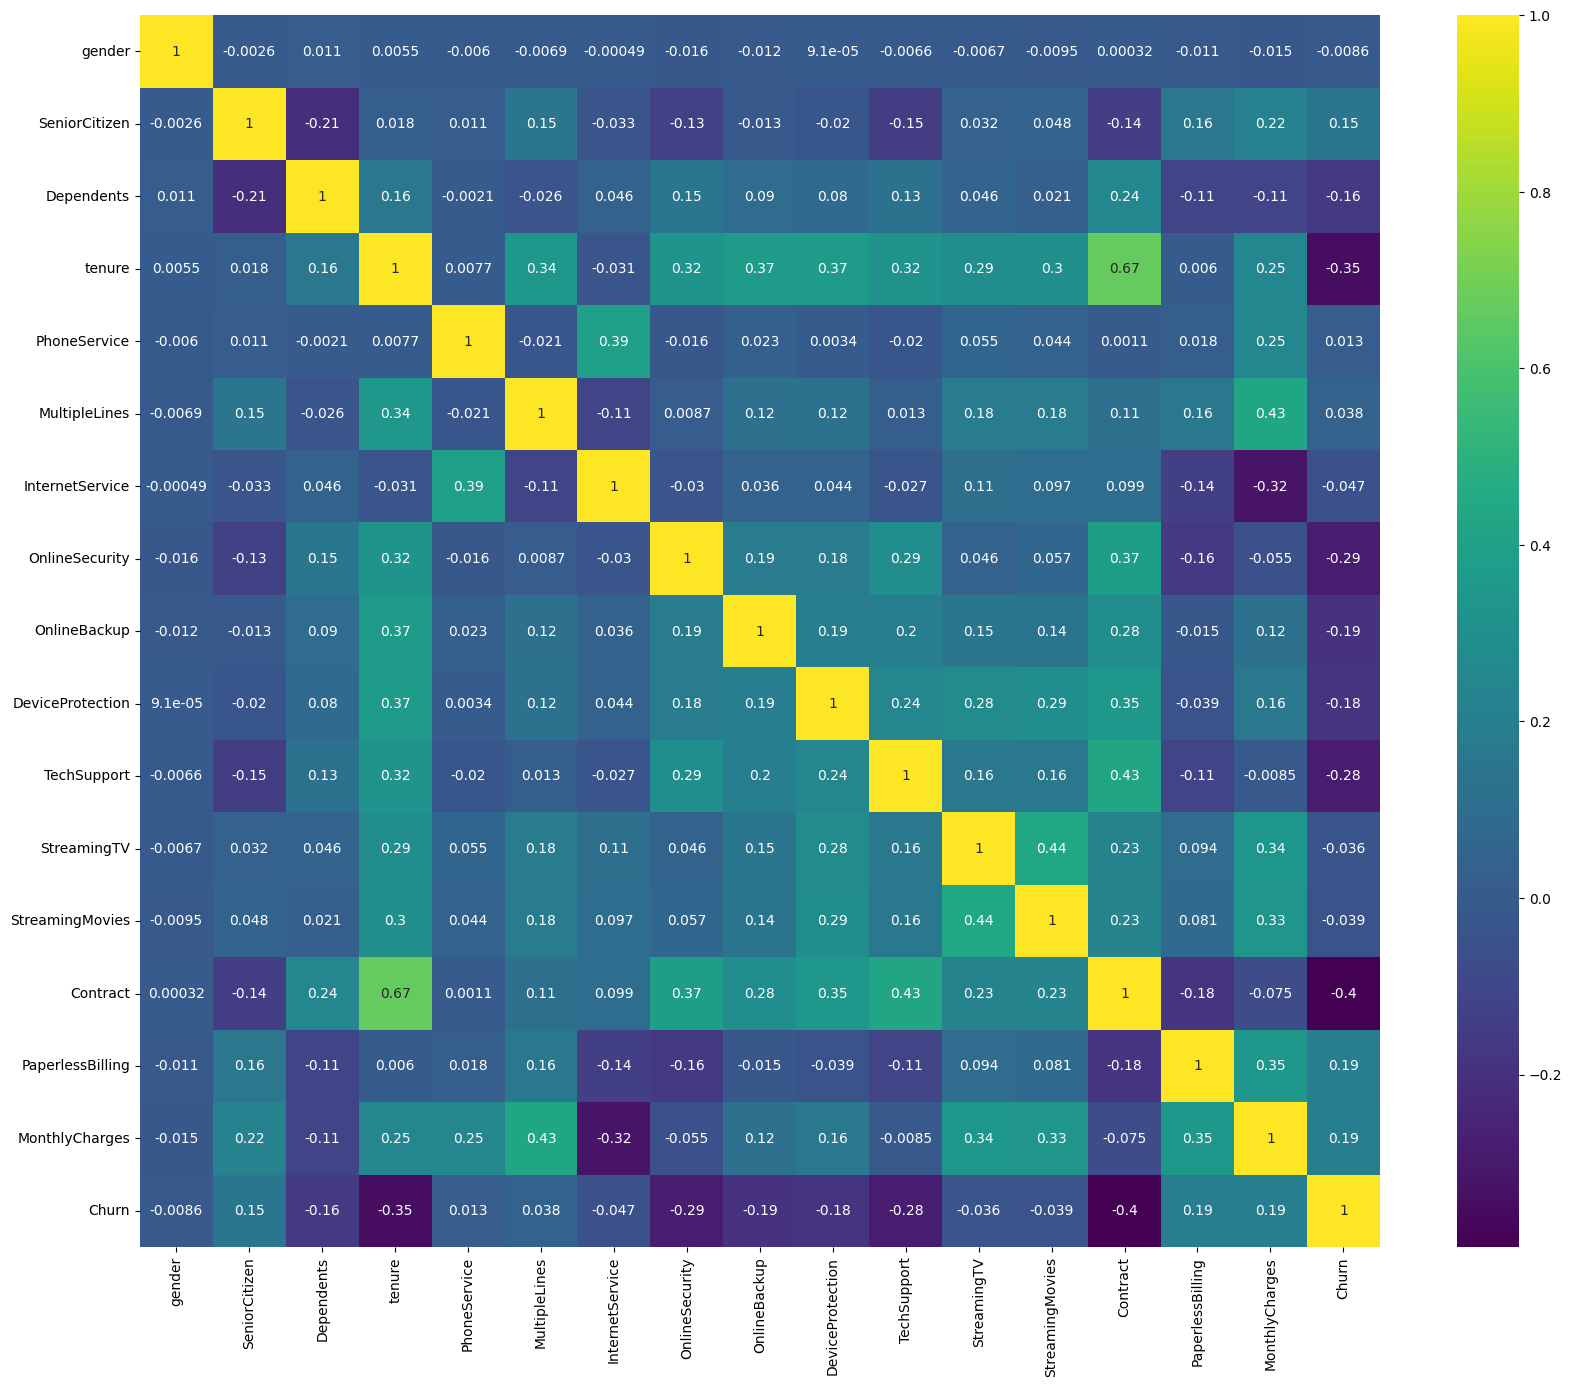

In [513]:
corr_matrix = df.corr()

# Set the figure size before creating the heatmap
plt.figure(figsize=(20,16))  # Adjust width and height as needed

sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

In [514]:
#taking Target variable as y and independent variable as x
y = df['Churn']
x=df.drop('Churn',axis=1)


In [515]:
#splitting the data into trian and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)


In [516]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [517]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (5282, 16)
y_train shape: (5282,)


# **Logistic Regression**

In [518]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_log_pred =lr.predict(x_test)
y_log_pred


array([1, 0, 0, ..., 0, 1, 0])

In [519]:
acc_log = accuracy_score(y_test,y_log_pred)
pre_log = precision_score(y_test,y_log_pred,average='weighted')
re_log = recall_score(y_test,y_log_pred,average='weighted')
f1_log = f1_score(y_test,y_log_pred,average='weighted')

print('Accuracy: ',acc_log)
print('Precision: ',pre_log)
print('Recall: ',re_log)
print('F1: ',f1_log)


Accuracy:  0.8126064735945485
Precision:  0.8049813595335978
Recall:  0.8126064735945485
F1:  0.8065735465093785


# **KNN**

Text(0, 0.5, 'accuracy')

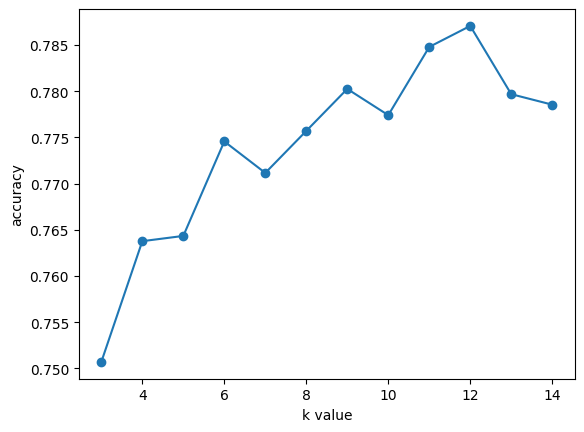

In [520]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors =np.arange(3,15)
for k in neighbors:
    k_model=KNeighborsClassifier(n_neighbors=k,metric="euclidean")
    k_model.fit(x_train,y_train)
    y_pred_knn=k_model.predict(x_test)
    acc_knn=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc_knn)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [521]:
knn=KNeighborsClassifier(n_neighbors=12,metric="minkowski")
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
acc_knn = accuracy_score(y_test,y_pred_knn)
pre_knn = precision_score(y_test,y_pred_knn, average='weighted')
re_knn = recall_score(y_test,y_pred_knn, average='weighted')
f1_knn = f1_score(y_test,y_pred_knn, average='weighted')
print('Accuracy: ',acc_knn)
print('Precision: ',pre_knn)
print('Recall: ',re_knn)
print('F1: ',f1_knn)


Accuracy:  0.787052810902896
Precision:  0.7742932881961719
Recall:  0.787052810902896
F1:  0.7753625069117677


# **Decision Tree**

In [522]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
acc_dt = accuracy_score(y_test,y_pred_dt)
pre_dt = precision_score(y_test,y_pred_dt, average='weighted')
re_dt = recall_score(y_test,y_pred_dt, average='weighted')
f1_dt = f1_score(y_test,y_pred_dt, average='weighted')

print('Accuracy: ',acc_dt)
print('Precision: ',pre_dt)
print('Recall: ',re_dt)
print('F1: ',f1_dt)


Accuracy:  0.7314026121521863
Precision:  0.7281184180035213
Recall:  0.7314026121521863
F1:  0.7296730458911754


# **Random Forest**

In [523]:

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
pre_rf = precision_score(y_test,y_pred_rf, average='weighted')
re_rf = recall_score(y_test,y_pred_rf, average='weighted')
f1_rf = f1_score(y_test,y_pred_rf, average='weighted')
print('Accuracy: ',acc_rf)
print('Precision: ',pre_rf)
print('Recall: ',re_rf)
print('F1: ',f1_rf)



Accuracy:  0.7808063600227144
Precision:  0.7692013406111876
Recall:  0.7808063600227144
F1:  0.7719400525114163


# **svc**

In [524]:


from sklearn.svm import SVC
sv= SVC(kernel='rbf')
sv.fit(x_train,y_train)
y_pred_sv = sv.predict(x_test)
acc_sv = accuracy_score(y_test,y_pred_sv)
pre_sv = precision_score(y_test,y_pred_sv, average='weighted')
re_sv = recall_score(y_test,y_pred_sv, average='weighted')
f1_sv = f1_score(y_test,y_pred_sv, average='weighted')


print('Accuracy: ',acc_sv)
print('Precision: ',pre_sv)
print('Recall: ',re_sv)
print('F1: ',f1_sv)

Accuracy:  0.8029528676888131
Precision:  0.7922630611167328
Recall:  0.8029528676888131
F1:  0.7908705172432322


# **Navie Bayes**

In [525]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred_nb=gnb.predict(x_test)
acc_nb = accuracy_score(y_test,y_pred_nb)
pre_nb = precision_score(y_test,y_pred_nb, average='weighted')
re_nb= recall_score(y_test,y_pred_nb, average='weighted')
f1_nb = f1_score(y_test,y_pred_nb, average='weighted')
print('Accuracy: ',acc_nb)
print('Precision: ',pre_nb)
print('Recall: ',re_nb)
print('F1: ',f1_nb)



Accuracy:  0.7569562748438388
Precision:  0.7990235420177649
Recall:  0.7569562748438388
F1:  0.7678463075347568


In [526]:

Accuracy = pd.DataFrame({'Models': ['Logistic Regression', 'KNN','Decision Tree', 'Random Forest','SVM_Linear', "Naive BAyers Model"],
                         'Accuracies':[acc_log,acc_knn,acc_dt,acc_rf,acc_sv,acc_nb]})

In [527]:

Accuracy

,Models,Accuracies
0,Logistic Regression,0.812606
1,KNN,0.787053
2,Decision Tree,0.731403
3,Random Forest,0.780806
4,SVM_Linear,0.802953
5,Naive BAyers Model,0.756956


# ***Here we get Logisitic Regression as the best model which having accuarcy 0.81 which is the highest comparing with other accuracy***

<Axes: xlabel='Churn', ylabel='count'>

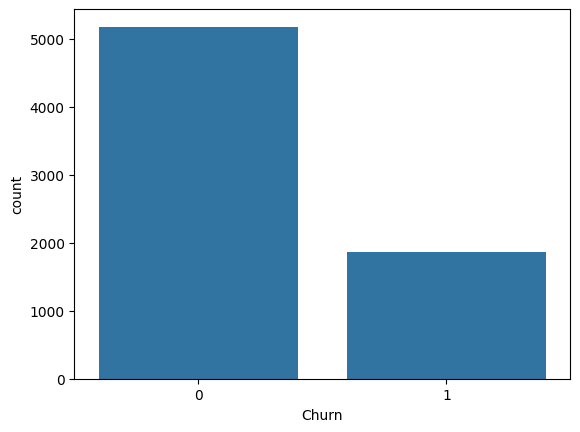

In [528]:
sns.countplot(data=df, x='Churn')

**Applying smote because our target variable is imbalanced**

In [529]:


from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


model= LogisticRegression()
model.fit(x_train_resampled, y_train_resampled)


y_log_pred_smote = model.predict(x_test)


acc_log_smote = accuracy_score(y_test, y_log_pred_smote)
pre_log_smote = precision_score(y_test, y_log_pred_smote, average='weighted')
re_log_smote= recall_score(y_test, y_log_pred_smote, average='weighted')
f1_log_smote = f1_score(y_test, y_log_pred_smote, average='weighted')

print('Accuracy: ', acc_log_smote)
print('Precision: ', pre_log_smote)
print('Recall: ', re_log_smote)
print('F1: ', f1_log_smote)

Accuracy:  0.7614991482112436
Precision:  0.8122791730048659
Recall:  0.7614991482112436
F1:  0.7730740317282702


**After  applying smote i am getting accuracy as 75.7 that is around 76**